# Desafío - Regularización

- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Regularización.

## Requerimientos
- En esta ocasión utilizaremos datos de la composición química de muestras de vino.
- Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
- Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    - Identifique el tipo de datos de cada columna.
    - Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
    - Encuentre la cantidad de valores faltantes en cada columna.
    - Grafique la distribución empírica de cada atributo

### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías básicas.
- Importe los métodos asociados a regularización.
- Importe la base de datos.

In [1]:
# Triada calsica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graficos
import seaborn as sns
import warnings
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Modulo de funciones especiales y graficos
import func as gfx

# Otras librerias, configuraciones e instancias
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('Datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Ejercicio 2: Análisis exploratorio
- Identifique el tipo de datos de cada columna.
- Identifique outliers univariados y multivariados.
    - Los primeros los puede encontrar realizando boxplots de cada atributo.
    - Los segundos estudiando los scatterplot entre pares de atributos.

In [3]:
# Identifique el tipo de datos de cada columna
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Encuentre la cantidad de valores faltantes en cada columna.
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

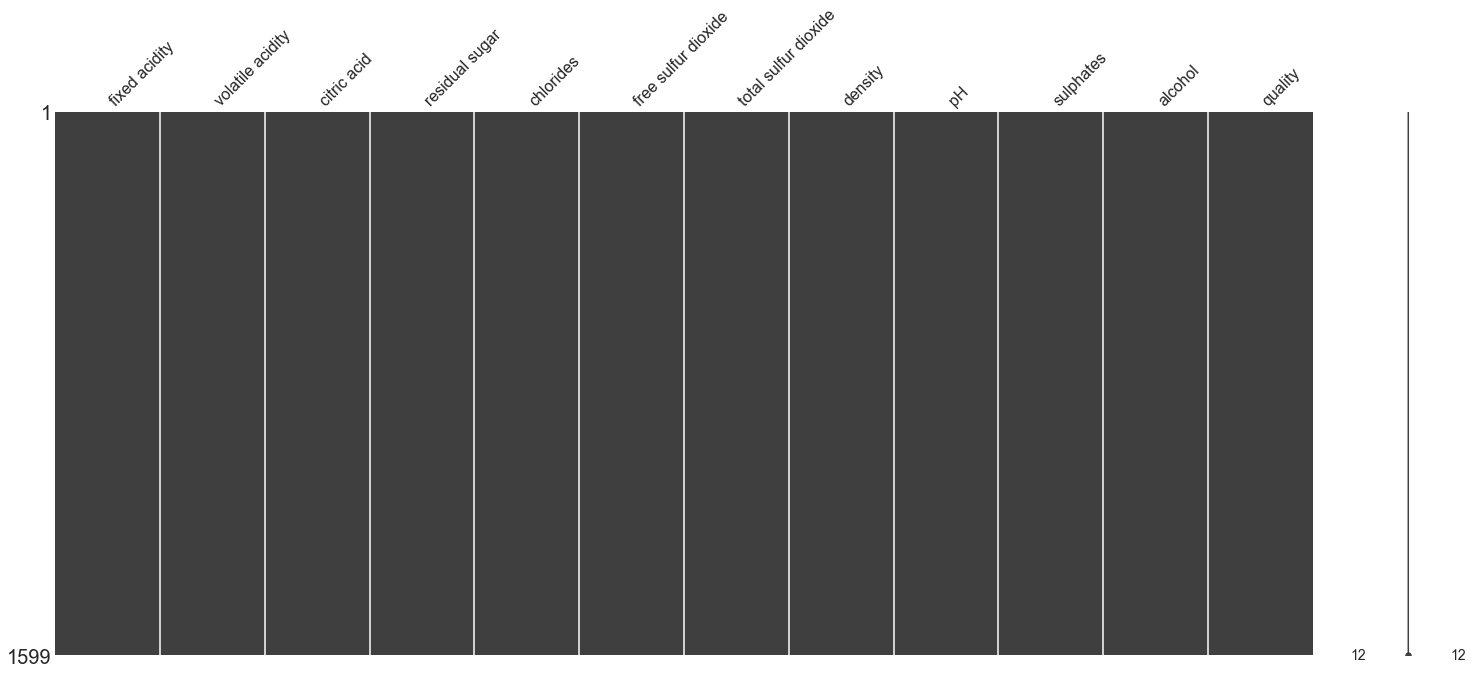

In [5]:
msngo.matrix(df)

In [6]:
# Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los
# scatterplot entre pares de atributos.
gfx.summary_drop(df)

,tipo,nulos,nulos_porces,ceros,ceros_porces,count,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
quality,int64,0,0.0,0,0.000000,1599.0,5.636023,0.807569,3.00000,5.0000,6.00000,6.000000,8.00000,1.000000,3.500000,7.500000,28
fixed acidity,float64,0,0.0,0,0.000000,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,2.100000,3.950000,12.350000,49
volatile acidity,float64,0,0.0,0,0.000000,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,0.250000,0.015000,1.015000,19
citric acid,float64,0,0.0,132,0.082552,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,0.330000,-0.405000,0.915000,1
residual sugar,float64,0,0.0,0,0.000000,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,0.700000,0.850000,3.650000,155
chlorides,float64,0,0.0,0,0.000000,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,0.020000,0.040000,0.120000,112
free sulfur dioxide,float64,0,0.0,0,0.000000,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,14.000000,-14.000000,42.000000,30
total sulfur dioxide,float64,0,0.0,0,0.000000,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,40.000000,-38.000000,122.000000,55
density,float64,0,0.0,0,0.000000,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,0.002235,0.992248,1.001187,45
pH,float64,0,0.0,0,0.000000,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,0.190000,2.925000,3.685000,35


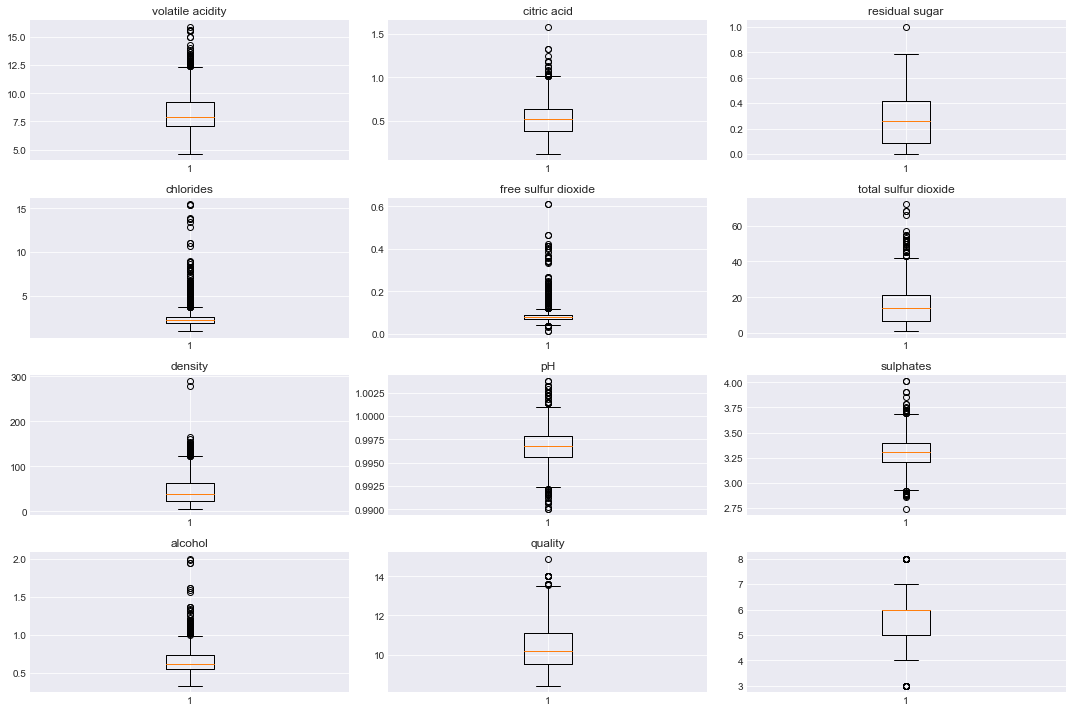

In [7]:
plt.figure(figsize=(15,10))
for i, (colname, serie) in enumerate(df.iteritems()):

        plt.title(colname)
        plt.subplot(4,3, i+1)
        plt.boxplot(x = serie)

plt.tight_layout()

In [8]:
name_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol', 'quality']

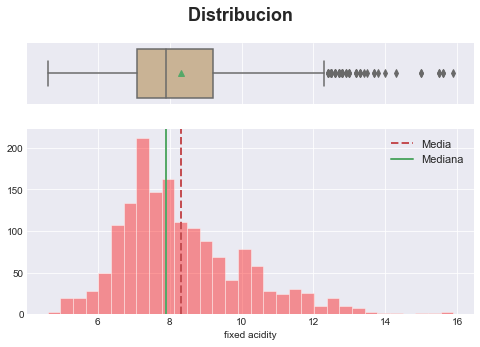

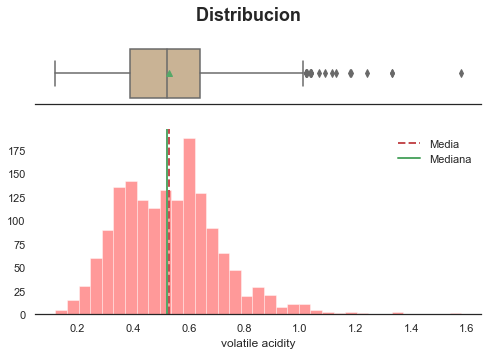

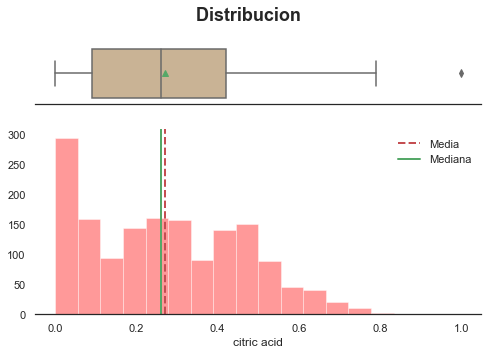

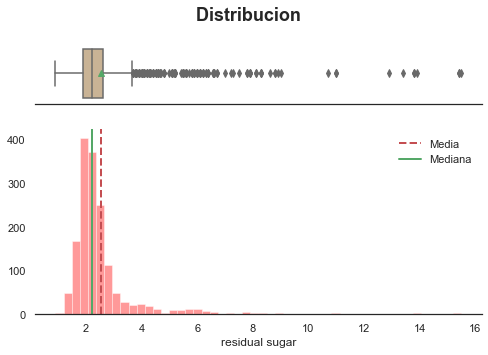

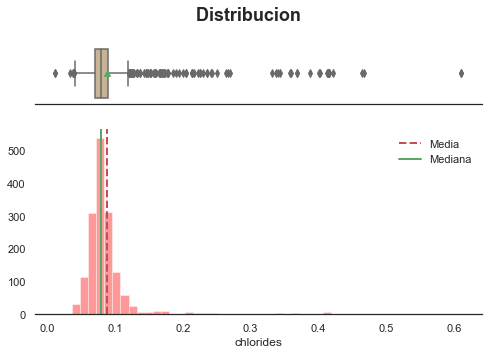

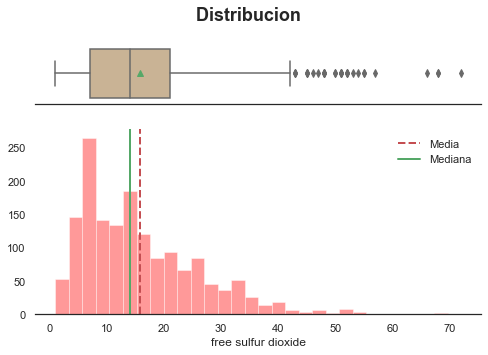

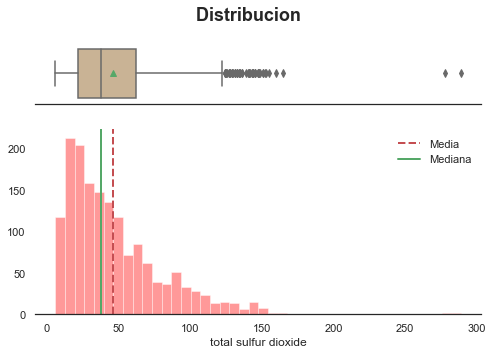

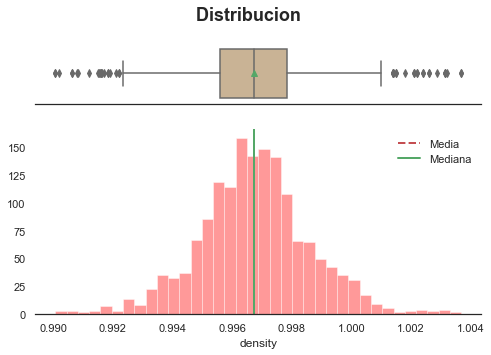

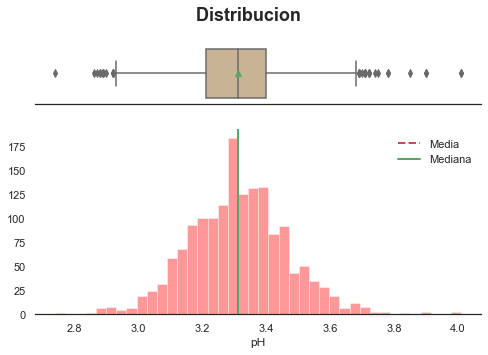

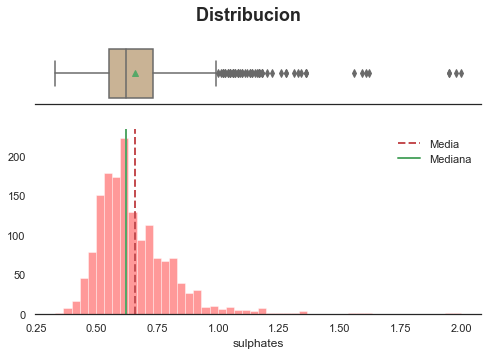

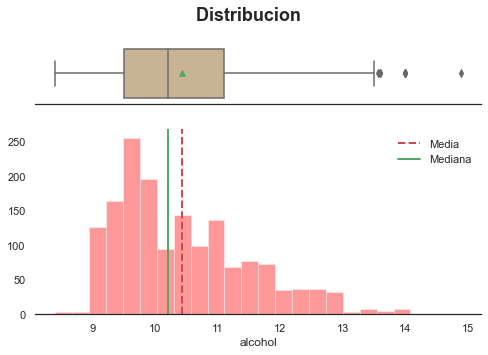

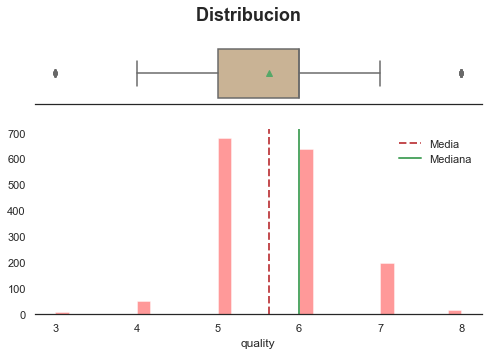

In [9]:
for i in range(len(name_vars)):
        gfx.dist_box(df[name_vars[i]])

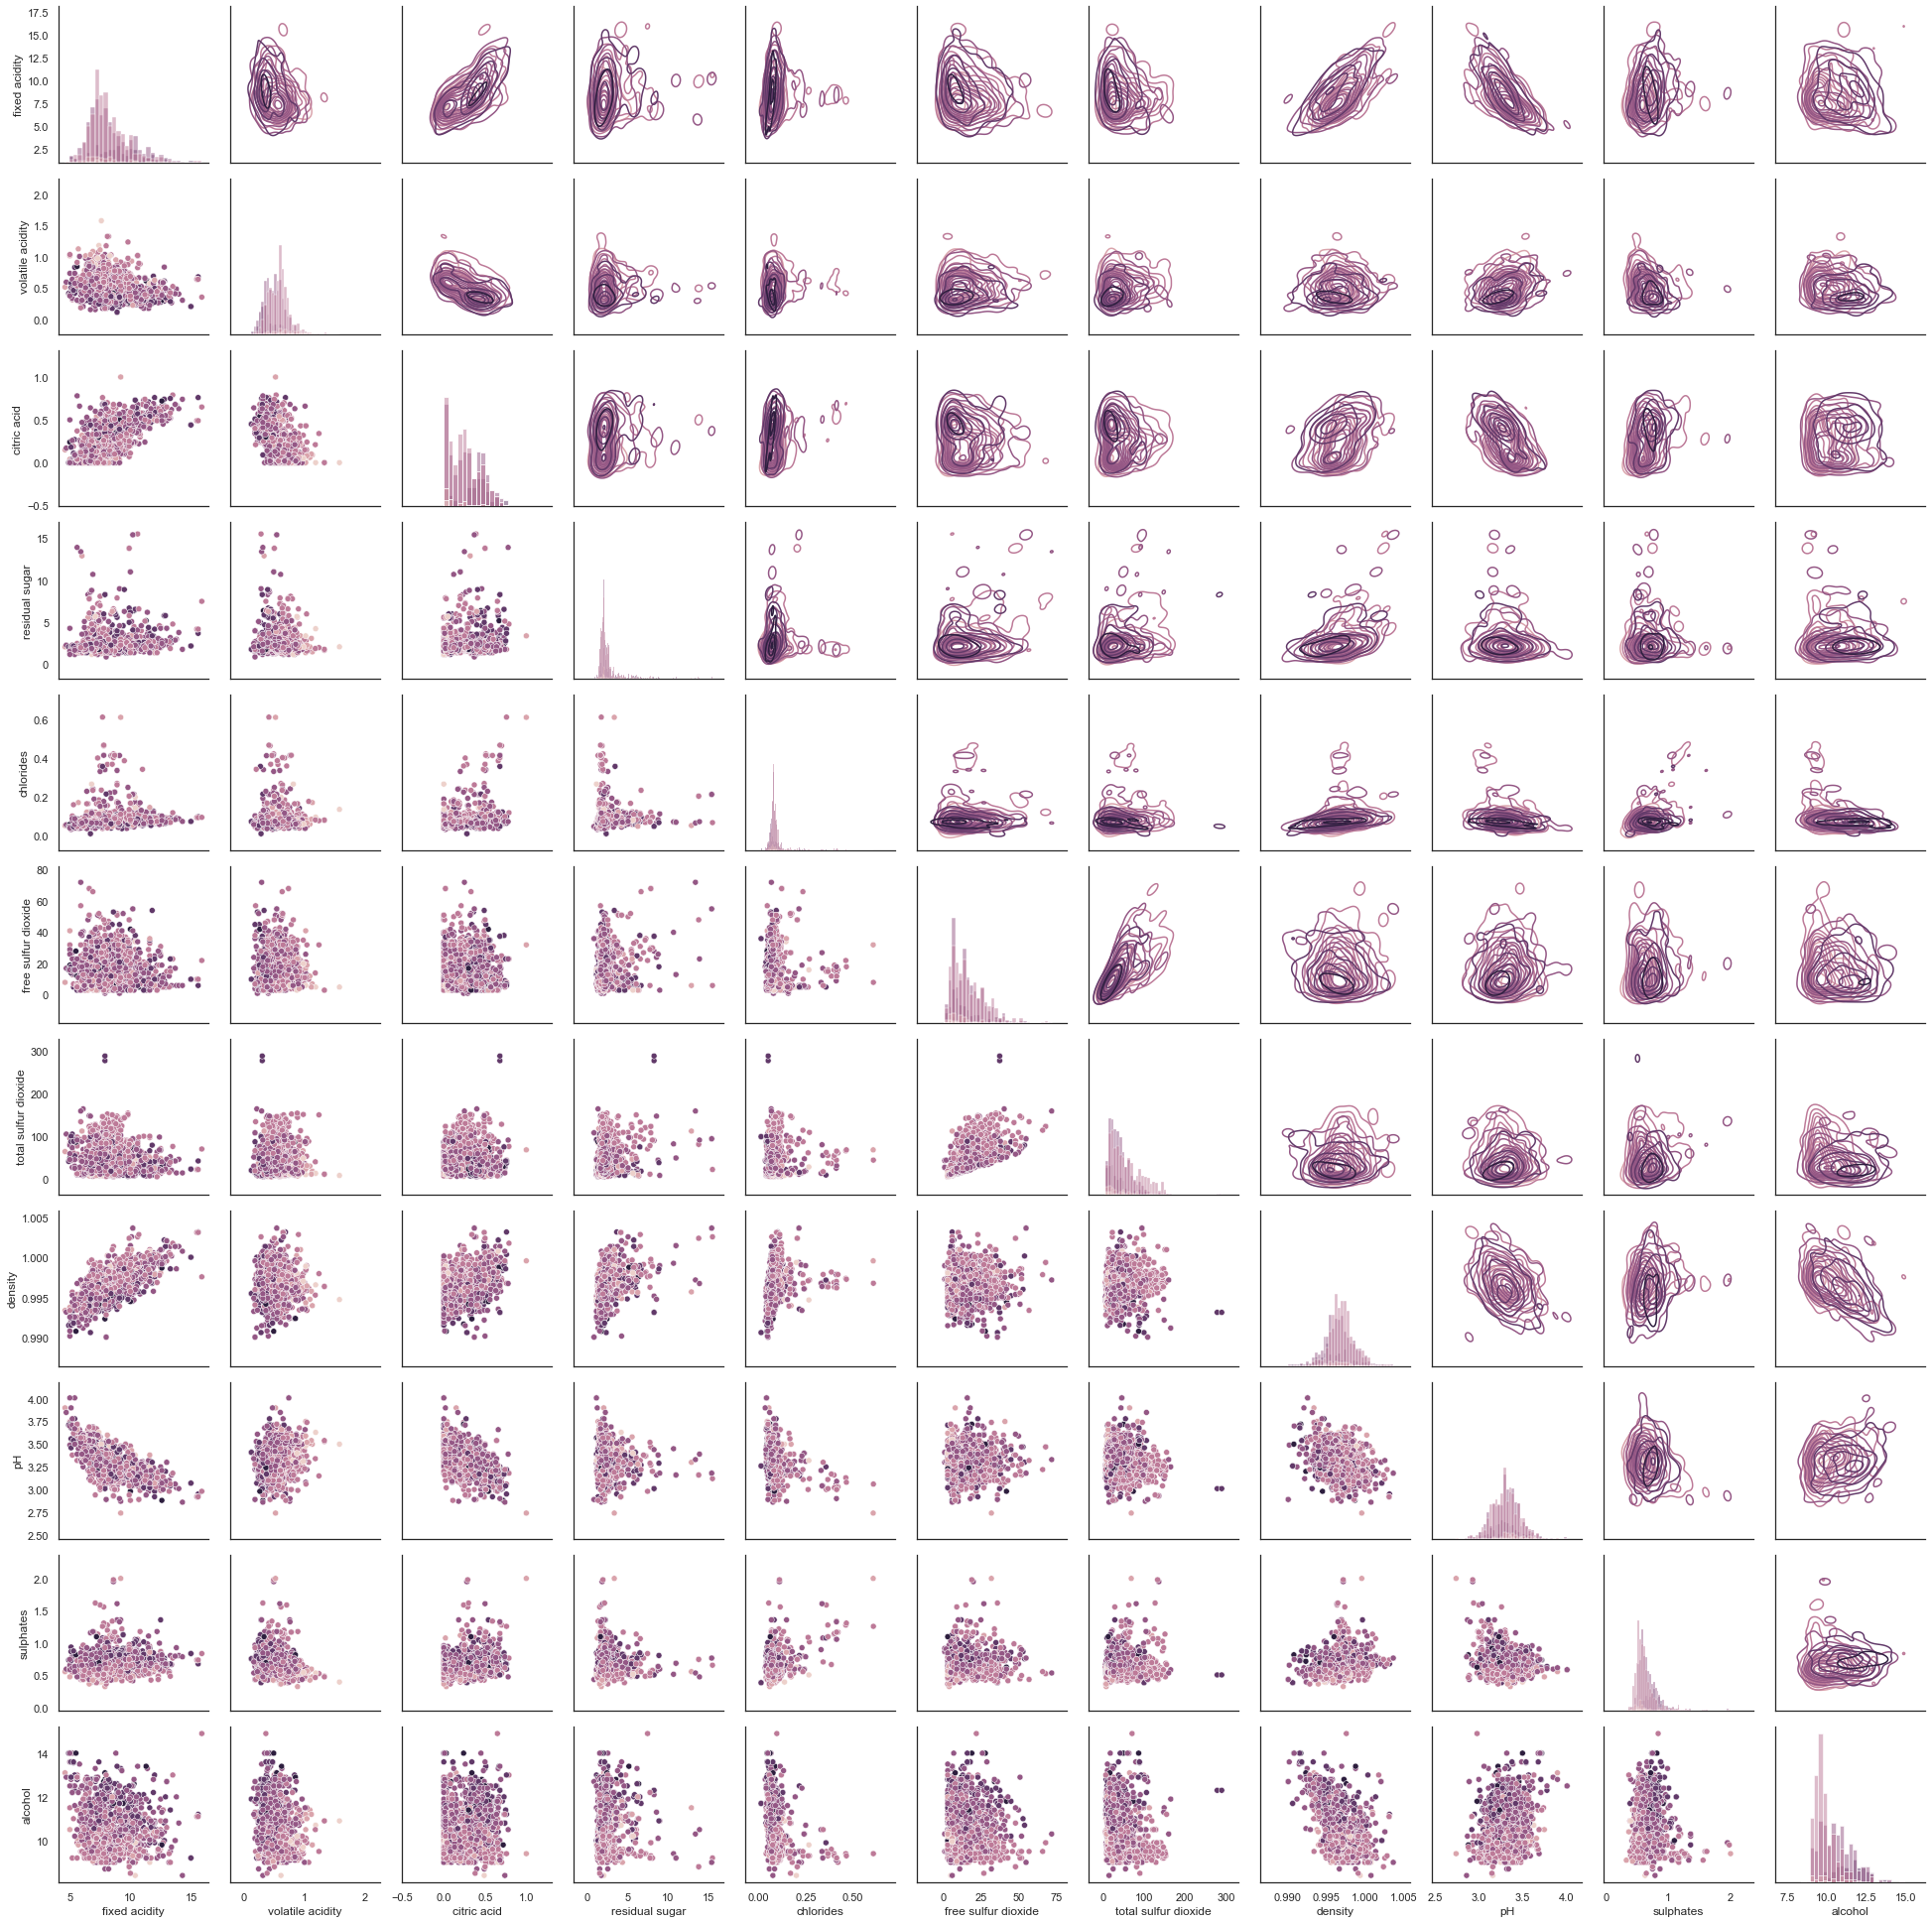

In [10]:
g = sns.PairGrid(df, corner = False, hue = 'quality')
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

### Ejercicio 3: Regularización de modelos

- Genere tres modelos, correspondientes a `RidgeCV` , `LassoCV` y `ElasticNetCV`. Para cada uno de ellos implemente los siguientes pasos:
    - Entrene los modelos con 10 validaciones cruzadas.
    - Extraiga los coeficientes estimados, el mejor valor `alpha`, MAE (`median_absolute_error`) y RMSE (raiz cuadrada de `mean_squared_error`) asociado a cada modelo.

In [11]:
# Separacion de entrenamiento y testing
X = df.drop(columns = 'quality')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 15820)

In [12]:
# Escalado de variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV
# Entrene los modelos con 10 validaciones cruzadas.
ridge = RidgeCV(cv = 10).fit(X_train, y_train)
lasso = LassoCV(cv = 10).fit(X_train, y_train)
enet = ElasticNetCV(cv = 10).fit(X_train, y_train)

In [14]:
''' 
Entrene los modelos con 10 validaciones cruzadas.
Extraiga los coeficientes estimados, el mejor valor alpha, 
MAE(median_absolute_error) y RMSE (raiz cuadrada de
mean_squared_error) asociado a cada model
'''

print(f'''Metricas para RIDGE
RMSE: {np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))}
MAE: {mean_absolute_error(y_test, ridge.predict(X_test))}

Metricas para LASSO
RMSE: {np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))}
MAE: {mean_absolute_error(y_test, lasso.predict(X_test))}

Metricas para ELASTIC NET
RMSE: {np.sqrt(mean_squared_error(y_test, enet.predict(X_test)))}
MAE: {mean_absolute_error(y_test, enet.predict(X_test))}
''')

Metricas para RIDGE
RMSE: 0.6745823128591157
MAE: 0.5211423527782493

Metricas para LASSO
RMSE: 0.6733204669666105
MAE: 0.5213346776958558

Metricas para ELASTIC NET
RMSE: 0.6732764914626318
MAE: 0.5215638505289236



**¿Qué modelo presenta un mejor desempeño en base a las métricas?**

**Respuesta**: LASSO

In [15]:
df_coef = pd.DataFrame({'Ridge':ridge.coef_, 'Lasso':lasso.coef_, 'enet':enet.coef_}, index = X.columns)
df_coef

,Ridge,Lasso,enet
fixed acidity,0.021570,0.000000,0.000000
volatile acidity,-0.190612,-0.189168,-0.188700
citric acid,-0.013261,-0.000000,-0.000000
residual sugar,0.010881,0.000000,0.000000
chlorides,-0.105110,-0.093109,-0.092167
free sulfur dioxide,0.062433,0.037167,0.035661
total sulfur dioxide,-0.109917,-0.084647,-0.083431
density,-0.033357,-0.004068,-0.005392
pH,-0.089843,-0.077645,-0.076533
sulphates,0.160702,0.145990,0.145038


In [16]:
df_coef.style.background_gradient(cmap = 'Greens')

,Ridge,Lasso,enet
fixed acidity,0.021570,0.000000,0.000000
volatile acidity,-0.190612,-0.189168,-0.188700
citric acid,-0.013261,-0.000000,-0.000000
residual sugar,0.010881,0.000000,0.000000
chlorides,-0.105110,-0.093109,-0.092167
free sulfur dioxide,0.062433,0.037167,0.035661
total sulfur dioxide,-0.109917,-0.084647,-0.083431
density,-0.033357,-0.004068,-0.005392
pH,-0.089843,-0.077645,-0.076533
sulphates,0.160702,0.145990,0.145038


**¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?**

                

**Respuesta: LASSO y ELASTICNET mantienen valores similares en comparacion a RIDGGE**

In [17]:
modelo = LinearRegression().fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, modelo.predict(X_test)))

0.6748667910502832

In [18]:
df_alpha = pd.DataFrame({'Ridge':ridge.alpha_, 'Lasso':lasso.alpha_, 'enet':enet.alpha_}, index = X.columns)
df_alpha

,Ridge,Lasso,enet
fixed acidity,10.0,0.009475,0.01895
volatile acidity,10.0,0.009475,0.01895
citric acid,10.0,0.009475,0.01895
residual sugar,10.0,0.009475,0.01895
chlorides,10.0,0.009475,0.01895
free sulfur dioxide,10.0,0.009475,0.01895
total sulfur dioxide,10.0,0.009475,0.01895
density,10.0,0.009475,0.01895
pH,10.0,0.009475,0.01895
sulphates,10.0,0.009475,0.01895


In [19]:
df_alpha.style.background_gradient(cmap = 'Reds')

,Ridge,Lasso,enet
fixed acidity,10.000000,0.009475,0.018950
volatile acidity,10.000000,0.009475,0.018950
citric acid,10.000000,0.009475,0.018950
residual sugar,10.000000,0.009475,0.018950
chlorides,10.000000,0.009475,0.018950
free sulfur dioxide,10.000000,0.009475,0.018950
total sulfur dioxide,10.000000,0.009475,0.018950
density,10.000000,0.009475,0.018950
pH,10.000000,0.009475,0.018950
sulphates,10.000000,0.009475,0.018950
